### Loading julia packages

In [60]:
push!(LOAD_PATH,"library");
#addprocs(Sys.CPU_CORES-nprocs());
using myFun
using PyPlot
nprocs()

1

### We will acquire 2D gradient-echo imaging data from a phantom, comprising 3 compartments:
![phantom](phantoms/phantom.jpg)


### We need to specify the following physical properties: 
* $T_2^*$ value for M1
* $T_2^*$ value for M2
* $T_2^*$ value for M3
* Frequency gradient value (e.g., due to susceptibility effect: [$\frac{\Delta \omega}{x}$,$\frac{\Delta \omega}{y}$] in Hz/mm) for M2
* Frequency gradient value (e.g., due to susceptibility effect: [$\frac{\Delta \omega}{x}$,$\frac{\Delta \omega}{y}$] in Hz/mm) for M3

In [61]:
T2valueForM1 = Float64(80e-3) # 80 msec
T2valueForM2 = Float64(80e-3) # 40 msec
T2valueForM3 = Float64(150e-3) # 150 msec
FrequencyGradientForM2 = [Float64(-4.5), Float64(0.)] # [Hz/mm along x-direction, Hz/mm along y-direction]
FrequencyGradientForM3 = [Float64(0.), Float64(-4.)]; # [Hz/mm along x-direction, Hz/mm along y-direction]

### We also need to choose the following MRI scan parameters:
* Field of view (FOV) of imaging
* Dwell time (DW) of k-space data sampling
* Echo time (TE)
* Acquisition matrix size 
* Noise intensity (arbitrary unit)

**TR** is assumed to be significantly larger than T1 in this very simple simulation that does not consider T1 effect

In [62]:
FOV = Float64(250.) # in mm
DW = Float64(50e-6) # hard-coded for now
matrixSizeX = Int64(64) # should be integer: 32, 64, 96 or 128
matrixSizeY = Int64(64) # should be integer: 32, 64, 96 or 128
TE = Float64(60e-3) # 60 msec: The minimal value allowed is about 20 msec.
NoiseLevel = Float64(1000.); # arbitrary unit: between 0 and 100000: you can start with 2000

### Data Acquisition and image reconstruction

In [63]:
# this may take 1 min to run
@time kSpaceData1 = MRIscan(T2valueForM1,T2valueForM2,T2valueForM3,FrequencyGradientForM2,FrequencyGradientForM3,FOV,DW,matrixSizeX,matrixSizeY,TE,NoiseLevel);
data1 = fftshift(fft(fftshift(kSpaceData1)));

 10

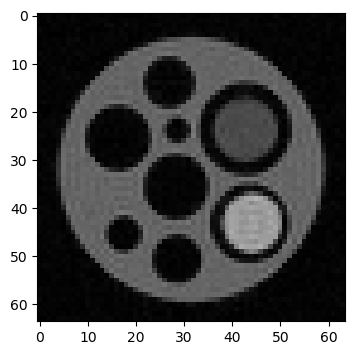

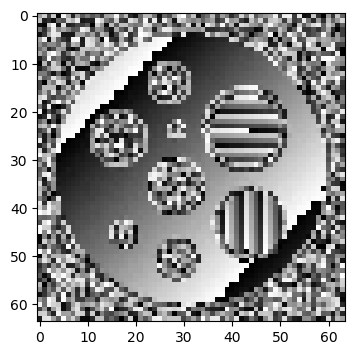

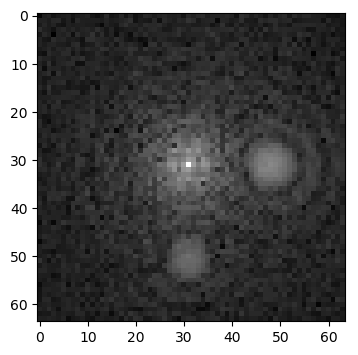

In [64]:
figure(1); figure(figsize=(4,4));imshow(abs.(data1),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(angle.(data1),cmap="gray", interpolation="none");
figure(3); figure(figsize=(4,4));imshow(abs.(kSpaceData1).^0.3,cmap="gray", interpolation="none");


### Zero-filling part of the k-space data

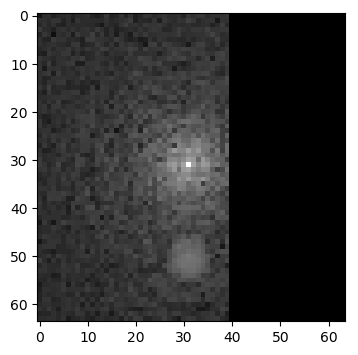

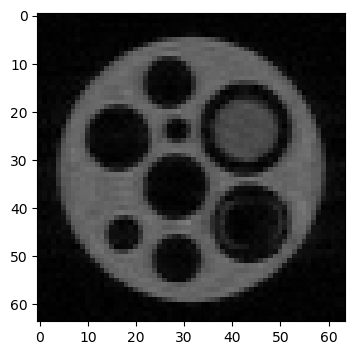

In [65]:
kSpaceData2 = deepcopy(kSpaceData1)
kSpaceData2[:,41:end]=0.
data2 = fftshift(fft(fftshift(kSpaceData2)));
figure(1); figure(figsize=(4,4));imshow(abs.(kSpaceData2).^0.3,cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(data2),cmap="gray", interpolation="none",vmin=0,vmax=5e6);

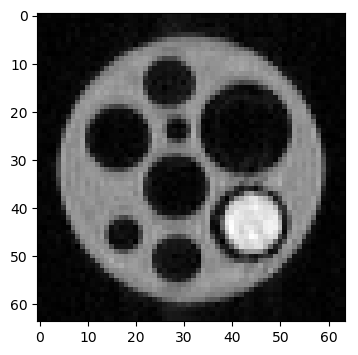

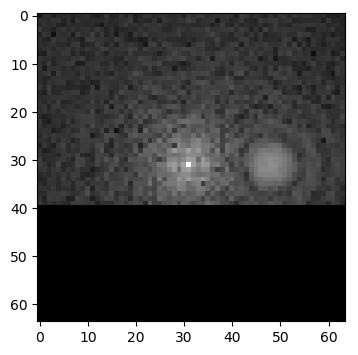

In [66]:
kSpaceData3 = deepcopy(kSpaceData1)
kSpaceData3[41:end,:]=0.
data3 = fftshift(fft(fftshift(kSpaceData3)));
figure(1); figure(figsize=(4,4));imshow(abs.(data3),cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData3).^0.3,cmap="gray", interpolation="none");

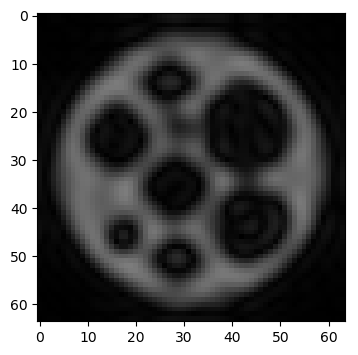

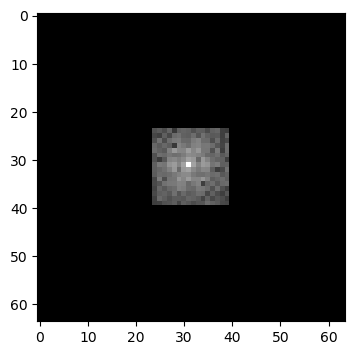

In [67]:
kSpaceData4 = deepcopy(kSpaceData1)
kSpaceData4[1:24,:]=0.
kSpaceData4[41:end,:]=0.
kSpaceData4[:,1:24]=0.
kSpaceData4[:,41:end]=0.
data4 = fftshift(fft(fftshift(kSpaceData4)));
figure(1); figure(figsize=(4,4));imshow(abs.(data4),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData4).^0.3,cmap="gray", interpolation="none");

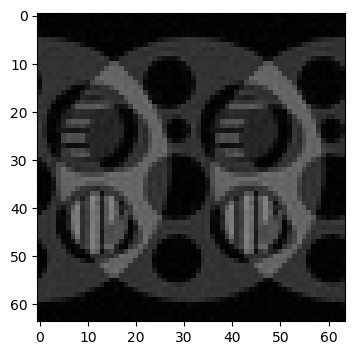

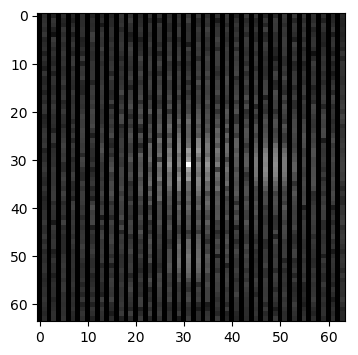

In [68]:
kSpaceData5 = deepcopy(kSpaceData1)
kSpaceData5[:,1:2:end]=0.
data5 = fftshift(fft(fftshift(kSpaceData5)));
figure(1); figure(figsize=(4,4));imshow(abs.(data5),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData5).^0.3,cmap="gray", interpolation="none");

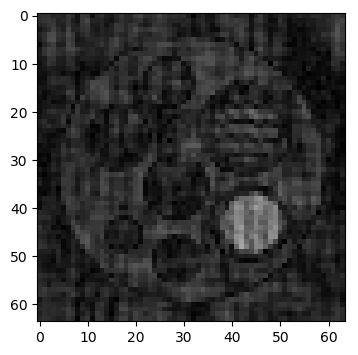

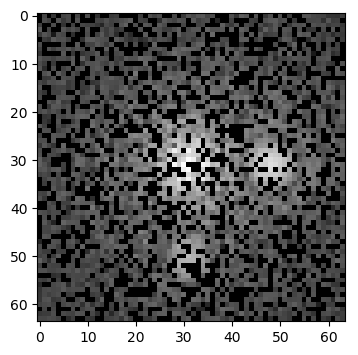

In [69]:
kSpaceData6 = deepcopy(kSpaceData1)
L = randperm(length(kSpaceData6[:]))
L2 = L[1:Int64(round(length(kSpaceData6[:])/3))]
kSpaceData6[L2]=0;
data6 = fftshift(fft(fftshift(kSpaceData6)));
figure(1); figure(figsize=(4,4));imshow(abs.(data6),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData6).^0.3,cmap="gray", interpolation="none");

## Homework (Feb 7th 2018)
1. Reconstruct images from k-space data that have only high spatial-frequency information
2. Reconstruct images from k-space data that only have 25% of the data, with only $k_y$ lines 1,5,9,13... $\ne$ 0 
3. Simulate motion artifact (optional)
4. Write a one-page proposal for your research project

# Homework Results

### 1. Reconstruct images from k-space data that have only high spatial frequency information.

To filter for the high frequency spatial data, two types of frequency domain highpass filters were implemented: separable (rectangular) and non-separable (circular).


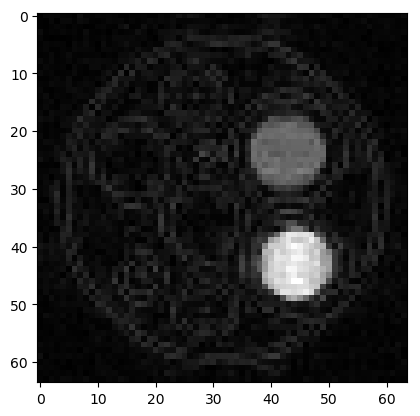

In [70]:
# Make another copy of kSpaceData1
kData1 = deepcopy(kSpaceData1);
# Center of k-space
center = 32;
# Set filter half bandwidth in kx and ky; use odd integers for even size kspace array
kHalfBW = 11;
# Zero out stopband
kData1[((center - kHalfBW):(center + kHalfBW)),(center - kHalfBW):(center + kHalfBW)] = 0;
#Compute inverse fft, display image
imageHPF = fftshift(fft(fftshift(kData1)));
figure(1); imshow(abs.(imageHPF),cmap = "gray");

Because of the imposed gradient, the Larmor frequency of the tubes shifted outside the stopband of the filter. 

### 2. Reconstruct images from k-space data that only have 25% of the data, with only $k_y$ lines 1,5,9,13... $\ne$ 0 

I experimented with removal of both $k_y$ and $k_x$ lines. The removal of $k_y$ lines (k-space rows) results in aliasing in the $y$ direction, while the removal of $k_x$ lines (k-space columns) results in aliasing in the $x$ direction. This makes sense - the reconstructed image FOV is inversely proportional to k-space sample spacing. With the removal of k-space lines, sample spacing is increased, thus reducing the FOV in the reconstructed image.


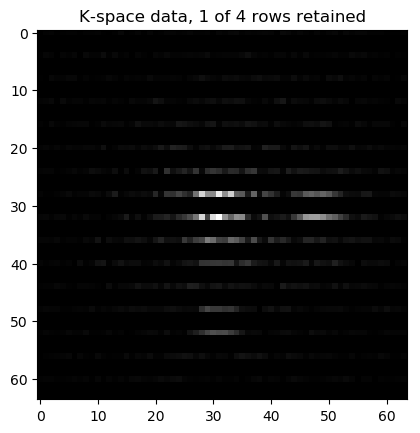

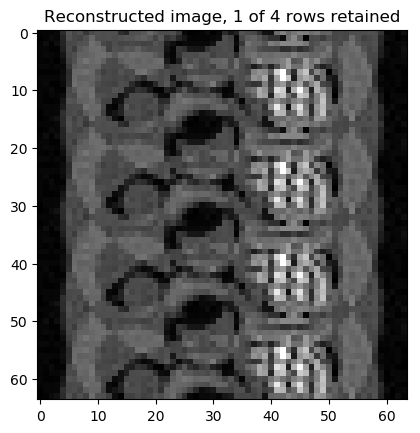

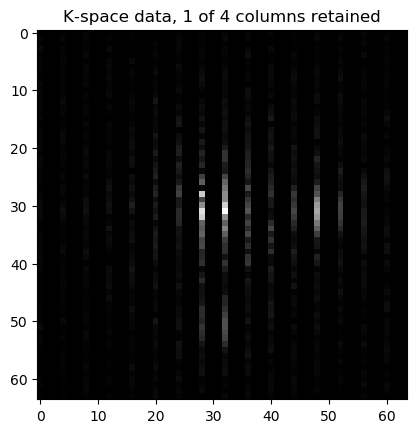

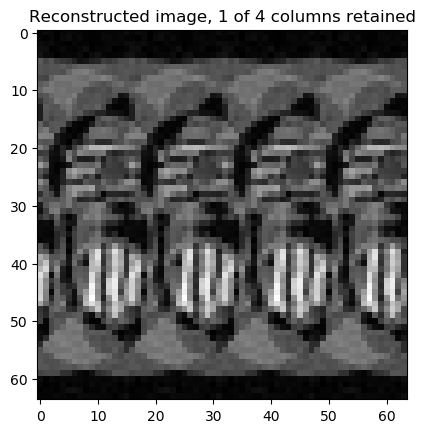

In [71]:
# Make a copy of k-space data
kData = deepcopy(kSpaceData1);
increment = 4;
indices = 1:size(kData,1);
# Identify indices that are congruent to 1 mod 4
indices = mod.(indices,increment);
ind = find(indices .!== 1)
# Zero out everything else
indices[ind] = 0;
# Turn into a binary 2-D mask 
indicesRows = repmat(indices,1,size(kData,2));
indicesCols = repmat(indices',size(kData,1),1);
# Apply mask
kDataRows = indicesRows.*kData;
kDataCols = indicesCols.*kData;
# Reconstruct image
imageRows = fftshift(fft(fftshift(kDataRows)));
imageCols = fftshift(fft(fftshift(kDataCols)));
# Plot.
figure(1);
imshow(abs.(kDataRows),cmap = "gray");
title("K-space data, 1 of 4 rows retained");
figure(2);
imshow(abs.(imageRows),cmap = "gray");
title("Reconstructed image, 1 of 4 rows retained");
figure(3);
imshow(abs.(kDataCols),cmap = "gray");
title("K-space data, 1 of 4 columns retained");
figure(4);
imshow(abs.(imageCols),cmap = "gray");
title("Reconstructed image, 1 of 4 columns retained");

### 3. Simulate motion artifact (optional).

I suspect that I'm doing this wrong. My reasoning: movement corresponds to shifting in the spatial domain. Shifting in the spatial domain by $\Delta x$ corresponds to modulation by a factor of $e^{i \pi \Delta x}$ in the frequency domain. I think I need to actually compute how the position change in each voxel produces produces resonance at different Larmor frequencies than in the original image. 

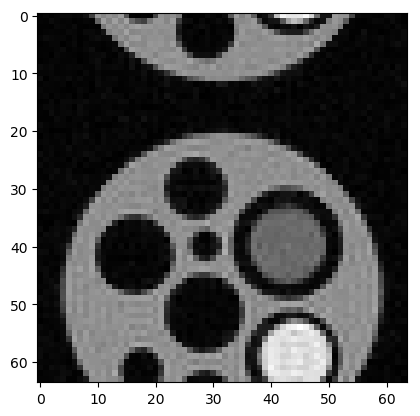

In [72]:
# Create a copy of original k-space data
originalKData = deepcopy(kSpaceData1);
# Create a shift vector
shift = 2.5*(1:size(originalKData,1));
# Create modulation array from shift vector
modulation = exp.(im*pi*shift);
modulation = repmat(modulation,1,size(originalKData,2));
# Apply modulation
shiftedKData = modulation.*originalKData;
# Reconstruct image
shiftedData = fftshift(fft(fftshift(shiftedKData)));
# Plot.
figure(1);
imshow(abs.(shiftedData), cmap = "gray");

### 4. Write a one-page proposal for your research project
Proposal to be submitted separately.